In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
libor_i=0.0424 ## Current 1 year treasury yield

In [100]:
def Duration (timetomaturity,nominalvalue,yieldrate,couponrate,compounding=2):
    import math as m
    yld=yieldrate/compounding
    cpnr=couponrate/compounding
    t=list(range(1,timetomaturity*compounding+1))
    cfi=nominalvalue*cpnr
    cfN=nominalvalue*cpnr+nominalvalue
    cfl=[cfi]*(len(t)-1)+[cfN]
    B=0 # B is the bond's present value
    for k in range(0,len(t)):#timetomaturity):
        B=B+cfl[k]/((1+yld)**(t[k]*compounding))  ##      (m.exp(-yld*t[k]))
    D=0 # D is the duration
    for i in range(0,timetomaturity):
        D+=((t[i])*cfl[i])/(((1+yld)**((t[k]*compounding)+1))*10000)
    return round(D,2),round(B,2),cfi

In [101]:
b_mat=30
bcr=0.0425
cpy=1
bp=100
bond_cf=bond_cash_flows(b_mat, principal=bp, coupon_rate=bcr, coupons_per_year=cpy)
bpc=102.75

In [102]:
bv,d,c=Duration(b_mat,bp,libor_i,bcr,2)
bv

0.01

In [90]:
li=[]
li_i=libor_i
step=(0.0424-0.0413)/30  ##Linear progression from 1 year to 30 year tresury yield to 30 year treasury yield
for j in range(b_mat):
    li_i=li_i+step
    li.append(li_i)

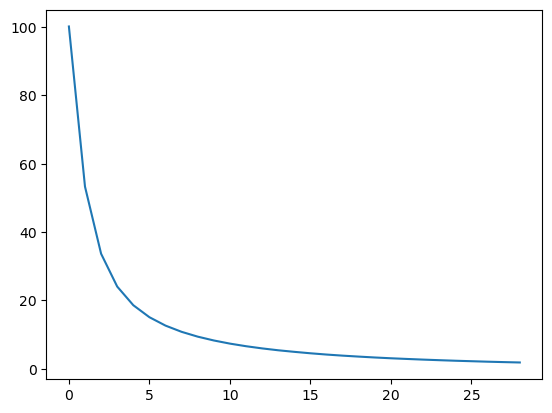

In [103]:
pl=[]
mil=[]
mpl=[]
for r in range(1,len(li)):
    d=((1+libor_i)**r)-1
    m1,b,cfb= Duration(b_mat,bp,d,bcr,cpy)
    if r==15:
        cf1=[cfb]*(r*cpy-1)+[bp]
        B=0 # B is the bond's present value
        for k in range(1,len(cf1)):
            B=B+cf1[k]/((1+d/cpy)**(k*cpy))
        D=0 # D is the duration
        for i in range(1,len(cf1)):
            D+=(i*cf1[i-1])/(((1+d/cpy)**(k*cpy+1))*10000)
        if B>b:
            pl.append(B) 
            mil.append(D)
        else:
            pl.append(b)
            mil.append(m1)
    else:
        pl.append(b)
        mil.append(m1)
li2=li[:-1]
plt.plot(pl)

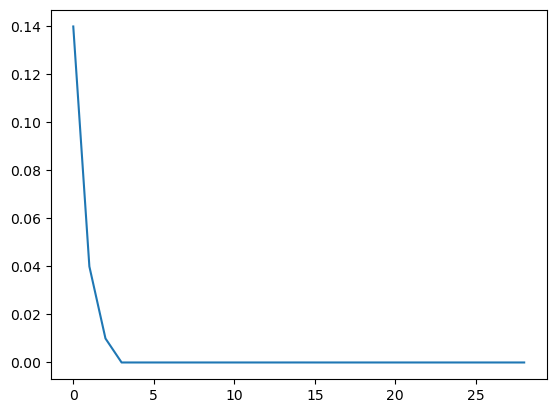

In [104]:
plt.plot(mil)